/Users/henryyi/Documents/Research/Toolbox/deconv/fmrisim_modified.py:1381: RuntimeWarning: Mean of empty slice
  auto_reg_rho = np.nanmean(auto_reg_rho_all, 0).tolist()
/Users/henryyi/Documents/Research/Toolbox/deconv/fmrisim_modified.py:1382: RuntimeWarning: Mean of empty slice
  ma_rho = np.nanmean(ma_all, 0).tolist()


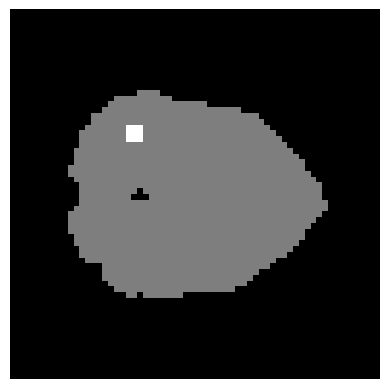

In [33]:
import loadvolume
from tools import plotfs
import time

path = './Participant_03_rest_run02.nii'


lv = loadvolume.loadvolume('./Participant_03_rest_run02.nii')

lv.loaddata()
lv.loadmask()
lv.generate_noise()
lv.generate_region()

In [5]:
import main_module

In [236]:
from importlib import reload
from tools import plotfs
plotfs = reload(plotfs)
main_module = reload(main_module)

/Users/henryyi/Documents/Research/Toolbox/deconv/fmrisim_modified.py:1381: RuntimeWarning: Mean of empty slice
  auto_reg_rho = np.nanmean(auto_reg_rho_all, 0).tolist()
/Users/henryyi/Documents/Research/Toolbox/deconv/fmrisim_modified.py:1382: RuntimeWarning: Mean of empty slice
  ma_rho = np.nanmean(ma_all, 0).tolist()


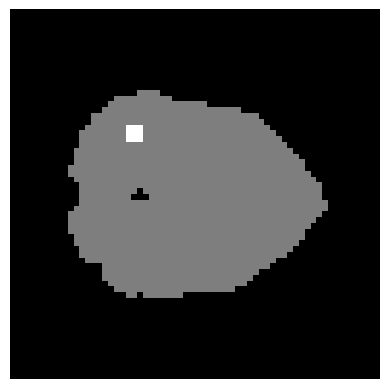

In [11]:
lv = main_module.load_noise('./Participant_03_rest_run02.nii')

In [237]:
import numpy as np
parameters = {
                "signal_mag": [2],
                "noise" : False,
                "nonlinear" : True,
                "null_ratio": 0,
                "hrf_type": 'double_gamma',
                "cutome_hrf_params": None,
                "contrast": np.array([1, 0, 0, 0]),
                "dist_parameter": None
             }
result, event_onsets = main_module.run_experiment(parameters = parameters, loadvolume = lv, config_filename = 'input.txt')

[[{'type': 'event', 'name': 'C1', 'event-duration': 0.1, 'intensity': 0.23}, {'type': 'inter-events', 'lsis': 2.0, 'usis': 6.0, 'distribution': 'exp', 'paradigm': 'attnmap'}, {'type': 'event', 'name': 'T1', 'event-duration': 0.2, 'intensity': None}, {'type': 'inter-events', 'lsis': 0.05, 'usis': 0.05, 'distribution': None, 'paradigm': None}, {'type': 'event', 'name': 'M1', 'event-duration': 0.05, 'intensity': None}, {'type': 'inter-events', 'lsis': 0.7, 'usis': 0.9, 'distribution': 'exp', 'paradigm': 'attnmap'}, {'type': 'event', 'name': 'R', 'event-duration': 0.5, 'intensity': None}], [{'type': 'event', 'name': 'C1', 'event-duration': 0.1, 'intensity': 0.23}, {'type': 'inter-events', 'lsis': 2.0, 'usis': 6.0, 'distribution': 'exp', 'paradigm': 'attnmap'}, {'type': 'event', 'name': 'T2', 'event-duration': 0.2, 'intensity': None}, {'type': 'inter-events', 'lsis': 0.05, 'usis': 0.05, 'distribution': None, 'paradigm': None}, {'type': 'event', 'name': 'M1', 'event-duration': 0.05, 'intensi

In [238]:
print(result.shape)

(64, 64, 27, 294)


In [239]:
lb = (lv.coordinates - ((lv.feature_size - 1) / 2)).astype('int')[0]
ub = (lv.coordinates + ((lv.feature_size - 1) / 2) + 1).astype('int')[0]

roi_brain = result[lb[0]:ub[0], lb[1]:ub[1], lb[2]:ub[2], :]
roi_brain = roi_brain.reshape((lv.voxels,result.shape[3]))
roi = roi_brain[13,:].T

In [240]:
from matplotlib import pyplot as plt

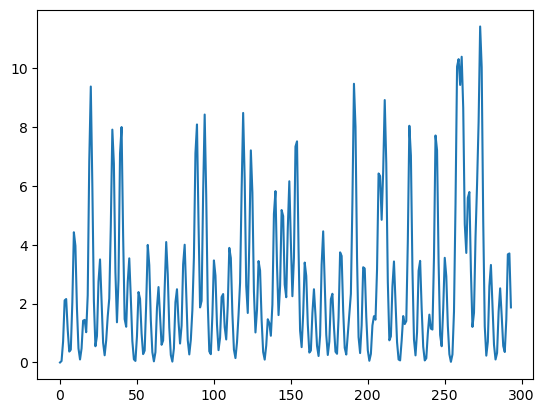

In [241]:
plt.plot(roi)

In [17]:
fig = plotfs.graph_timecourses(result,  stimuli_onsets = event_onsets, xlim = 30, ylim = 1.2)

NameError: name 'result' is not defined

In [159]:
result['2']['5']['t1']

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0.

In [167]:
plotfs.avgResponse(result['2']['5']['t1'], result['2']['5']['e'])

array([6.44781482, 6.33465819, 6.6530529 , 6.39399139, 6.50338751,
       6.94120448, 6.81865551, 6.86972365, 6.66986133, 6.50649976,
       6.5988143 , 6.70309706, 6.60676648])

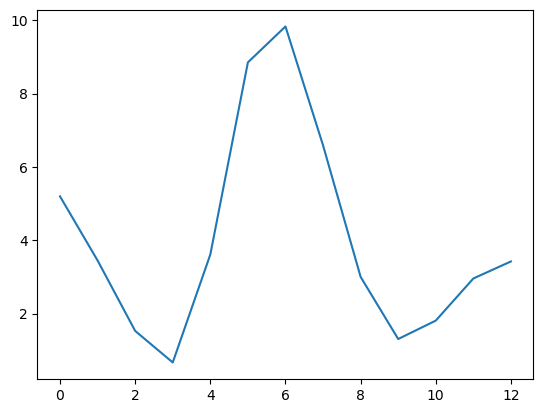

In [169]:
plt.plot(plotfs.avgResponse(result['7']['18']['t1'], result['7']['18']['e']))

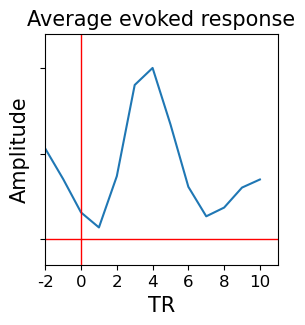

In [200]:
plotfs = reload(plotfs)
plotfs.plot_avg_response(result['7']['18']['t1'], result['7']['18']['e'])

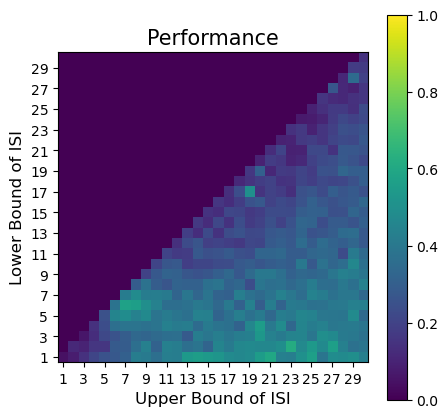

In [207]:
plotfs = reload(plotfs)
fig = plotfs.plot_result(p1, p2)

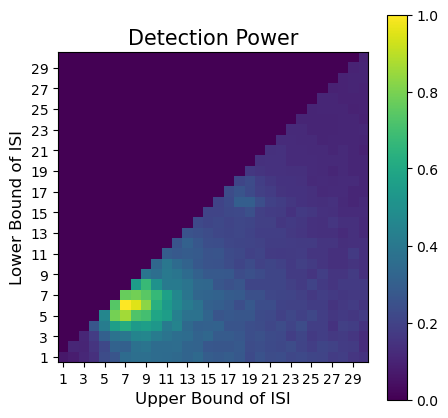

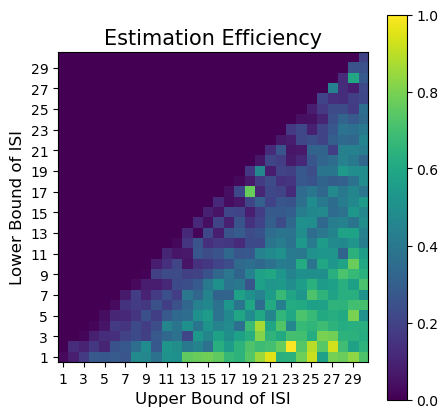

In [206]:
fig1, fig2 = plotfs.plotdata(p1,p2,normalize = True)

In [62]:
import design
import numpy as np

parameters = {
                "cue_ratio" : 1,
                "dist" : "uniform",
                "paradigm" : None,
                "cue_duration":0.1
             }
def test(max_lisi, max_uisi, parameters):
        p1 = np.zeros((max_lisi, max_uisi))
        p2 = np.zeros((max_lisi, max_uisi))
        result = []
        
        k = 0
        start = time.time()
        # store = 1
        for lisi in np.arange(1, max_lisi + 1, 1):
            result = [ *result, [] ]
            l = 0
            for uisi in np.arange(1, max_uisi + 1, 1):
                if lisi > uisi:
                    l += 1
                    continue
                if parameters["paradigm"]:
                    arg_map = parameters["paradigm"] + 'map'
                else:
                    arg_map = None

                d = design.expdesign(lisi, uisi, 0.1, 100, [2], lv, parameters["dist"], 30,
                                     parameters["cue_ratio"], noise = False, nonlinear = True, load = arg_map)

                data = d.tcourse()
                e = design.expanalyse(data, np.array([1, 0]), expdesign = d)
                p1[k,l] = e.calc_Fd()
                p2[k,l] = e.calc_Fe(ncond =2)
                
                result[lisi - 1] = [ *result[lisi - 1], {
                    "e": e.roi,
                    "t": e.design[:,0] + e.design[:,1]
                } ]
                
                l += 1
            k += 1
        print(f'Time: {time.time() - start}')
        return p1, p2, result

In [64]:
p1, p2, result = test(design, 30, 30, parameters)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Time: 35.48256826400757


In [13]:
import matplotlib.pyplot as plt
colors = plt.cm.get_cmap('hsv', 20)

In [71]:
l = 0;
for i in result:
    print(len(result[l]))
    l = l + 1
print(l)


30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
30


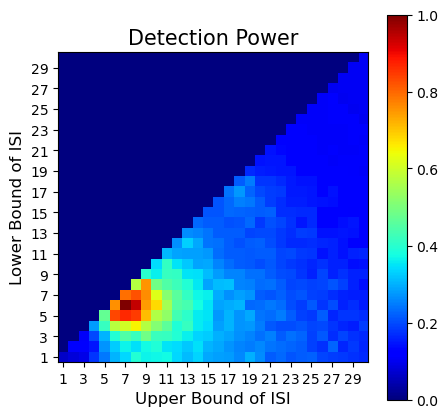

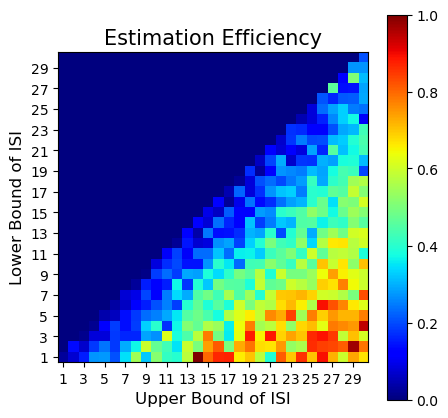

In [65]:
fig1,fig2 = plotfs.plotdata(p1,p2,40,40,normalize = True)

#func combined optimality (p1,p2,w1 = 0.5,w2 = 0.5)
#w1 + w2 = 1, valueerror, 0.5 each
#standardize the values

#p = w1*stand(p1) + w2*stand(p2)
#plot(p,'combined optimaility')

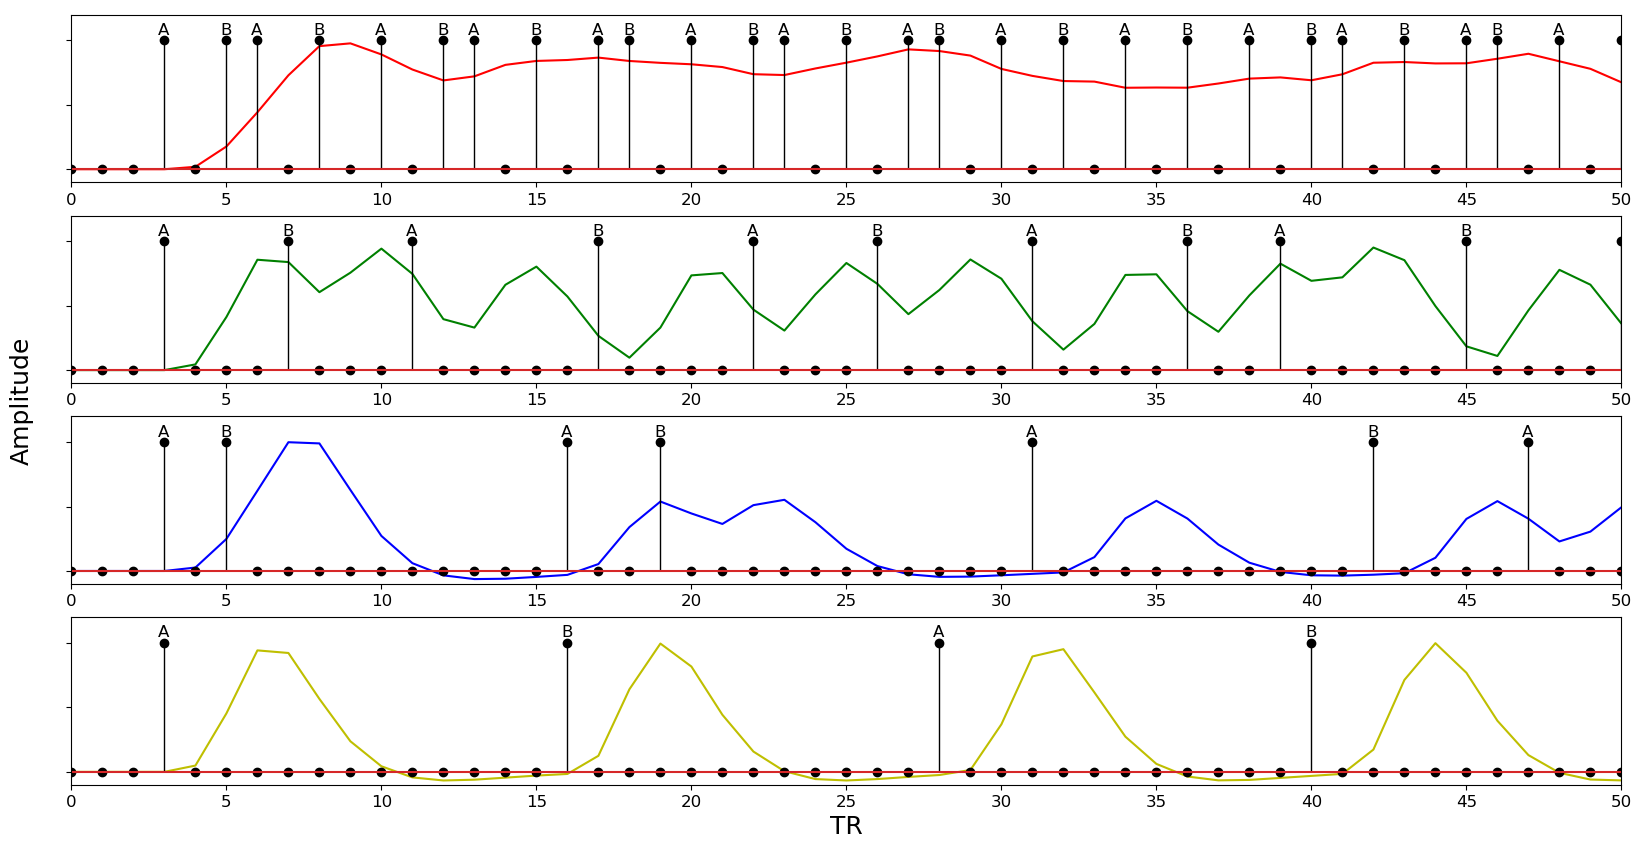

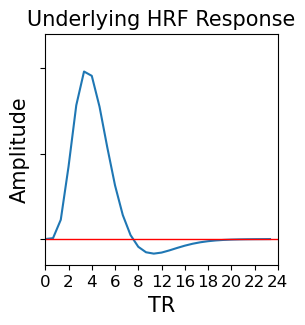

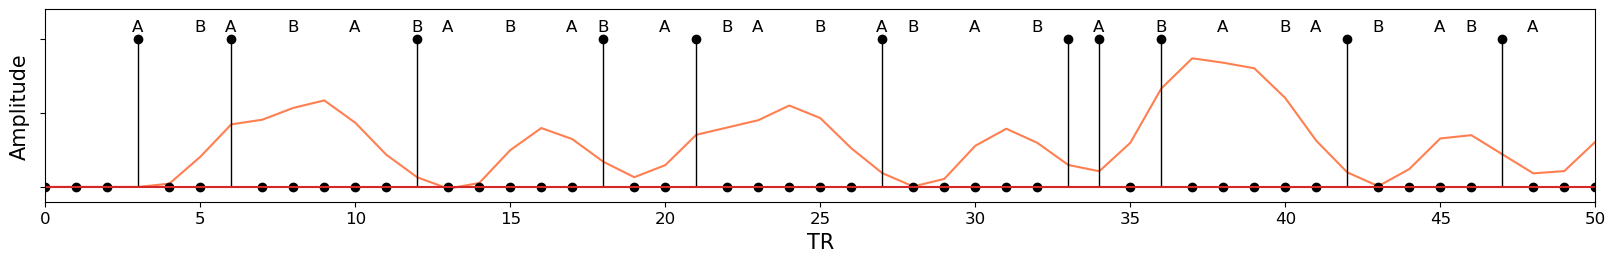

In [4]:

from matplotlib import pyplot as plt
import numpy as np

#%% Data reformatting

def remove_transient(x):
    for i in range(0,len(x)):
        if x[i] == 0.66:
            x[i] = 0
    return x
            
e1 = e1/np.max(e1)
e2 = e2/np.max(e2)
e3 = e3/np.max(e3)
e4 = e4/np.max(e4)
e5 = e5/np.max(e5)

t1 = remove_transient(t1)
t2 = remove_transient(t2)
t3 = remove_transient(t3)
t4 = remove_transient(t4)
t5 = remove_transient(t5)



#%%

fig = plt.figure(figsize = (20,10))

mainax = fig.add_subplot(111)
mainax.spines['top'].set_color('none')
mainax.spines['bottom'].set_color('none')
mainax.spines['left'].set_color('none')
mainax.spines['right'].set_color('none')
mainax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)



ax = fig.add_subplot(411)
plt.plot(e1,color = 'r')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t1)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t1[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1
            

ax = fig.add_subplot(412)
plt.plot(e2,color = 'g')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t2)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t2[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1


ax = fig.add_subplot(413)
plt.plot(e3,color = 'b')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t3)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t3[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1

ax = fig.add_subplot(414)
plt.plot(e4,color = 'y')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t4)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t4[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1



mainax.set_xlabel('TR',fontsize = 18)
mainax.set_ylabel('Amplitude', fontsize = 18)
plt.subplots_adjust(wspace=0.1, hspace=0.2)

#fig.savefig("timecourses",dpi = 600,bbox_inches = 'tight',pad_inches = 0.1)
#%% Simple HRF plot

from tools._dghrf import _dghrf
plt.figure(figsize = (3,3))
hrf = _dghrf()
plt.plot(hrf)
plt.xticks(np.arange(0,33,3),labels = [0,2,4,6,8,12,16,18,20,22,24],fontsize = 12)
plt.yticks([0,0.5,1],'')
plt.ylim(-0.15,1.2)
plt.xlim(0,30)
plt.axhline(0, color='red',lw = 1)
plt.title('Underlying HRF Response',fontsize = 15)
plt.xlabel('TR',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)

#%% Best timecourse plot

fig = plt.figure(figsize = (20,2.5))

ax = fig.add_subplot(111)
plt.plot(e5,color = 'coral')
plt.xlim(0,50)
plt.ylim(-0.1,1.2)
(markers, stemlines, baseline) = plt.stem(t5)
plt.setp(stemlines, linestyle="-", color="black", linewidth=1 )
plt.setp(markers, color="black")

plt.xticks(np.linspace(0,50,11),fontsize = 12)
plt.yticks([0,0.5,1],labels = [],fontsize = 12)

#ax.set_title('Profile 5',fontsize = 15)
f = 1
for i in range(0,50):
    if t1[i] == 1:
        if f:    
            ax.text(i - 0.2 , 1.05,'A',fontsize = 12)
            f = 0
        else:
            ax.text(i - 0.2 , 1.05,'B',fontsize = 12)
            f = 1
plt.xlabel('TR',fontsize = 15)
plt.ylabel('Amplitude',fontsize = 15)
fig.savefig("timecourses_recommend",dpi = 600,bbox_inches = 'tight',pad_inches = 0.1)

In [5]:
import design

design.expdesign(lisi, uisi, 0.1, 100, [2], lv, dist,30,
                             cue_ratio,noise = False,nonlinear = True,load = arg_map)
tevents,
                 signal_mag,loadvolume,
                 distribution,
                 exp,
                 cue_ratio = None, 
                 noise = False,
                 nonlinear = True, 
                 load = None
def createExpdesign(l_isi, u_isi, event_endurance, )

IndentationError: unexpected indent (3160002280.py, line 6)

In [125]:
import time
maxp1 = 0
maxp2 = 0
#%%

import design
import numpy as np
from scipy.integrate import quad,simps
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import importlib as imp
import matplotlib.pyplot as plt
#%matplotlib qt
p1 = np.zeros((30,30))
p2 = np.zeros((30,30))
import importlib
importlib.reload(design)
k = 0
paradigm = ''
cue_ratio = 1
dist = 'uniform'
start = time.time()
store = 1
for lisi in np.arange(1,30,1):
    l = 0
    for uisi in np.arange(1,30,1):
        if lisi > uisi:
            l += 1
            continue
        if paradigm:
            arg_map = paradigm + 'map'
        else:
            arg_map = None
            
        d = design.expdesign(lisi, uisi, 0.1, 100, [2], lv, dist,30,
                             cue_ratio,noise = False,nonlinear = True,load = arg_map)
                
        data = d.tcourse()
        e = design.expanalyse(data, np.array([1, 0]), expdesign = d)
        p1[k,l] = e.calc_Fd()
        p2[k,l] = e.calc_Fe(ncond =2)
        if store:
            if lisi == 2 and uisi == 3:
                e1 = e.roi
                t1 = e.design[:,0] + e.design[:,1]
            if lisi == 5 and uisi == 9:
                e2 = e.roi
                t2 = e.design[:,0] + e.design[:,1]
            if lisi == 2 and uisi == 19:
                e3 = e.roi
                t3 = e.design[:,0] + e.design[:,1]
            if lisi == 18 and uisi == 19:
                e4 = e.roi
                t4 = e.design[:,0] + e.design[:,1]
            if lisi == 2 and uisi == 10:
                e5 = e.roi
                t5 = e.design[:,0] + e.design[:,1]

        l += 1
    k += 1
    print(lisi)
print(f'Time: {time.time() - start}')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Time: 26.297602891921997


In [ ]:
pip install pyplot

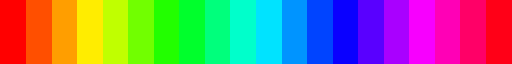

In [54]:
plt.cm.get_cmap('hsv', 10+10)

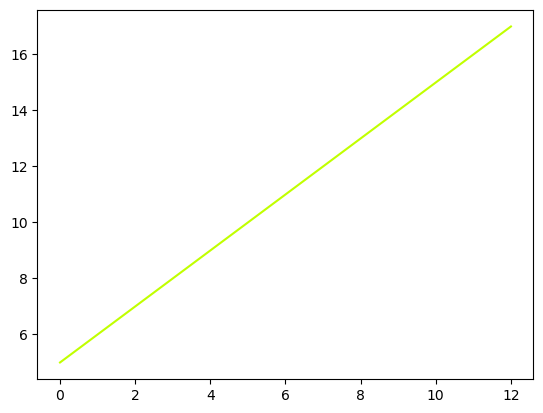

In [45]:
plt.plot(np.linspace(7 - 2,7 + 10,13).astype('int'), color=cmap(4))

In [43]:
cmap(0)

(1.0, 0.0, 0.0, 1.0)

In [47]:
print(cmap)

In [70]:
str(2)

'2'

In [81]:
int('3')

3

In [134]:
t2 == result['5']['9']['t']

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True,

In [137]:
result['5']['9']['e']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.36651105e-06,
       5.32538378e-01, 4.95783008e+00, 1.03063453e+01, 1.00871977e+01,
       6.19030966e+00, 2.59273183e+00, 1.01900597e+00, 4.36662561e+00,
       9.22138224e+00, 9.10614746e+00, 5.54918747e+00, 3.37495152e+00,
       6.60030744e+00, 9.91316306e+00, 8.31064531e+00, 4.49198482e+00,
       1.50936664e+00, 1.59843308e+00, 6.46076252e+00, 9.69897820e+00,
       7.72203384e+00, 4.00049603e+00, 1.49236032e+00, 3.51314029e+00,
       8.53150610e+00, 9.42849623e+00, 6.19632498e+00, 2.70164672e+00,
       1.78089885e+00, 5.99522222e+00, 9.67178243e+00, 8.17300095e+00,
       6.51859238e+00, 9.48629342e+00, 1.08267959e+01, 7.69598482e+00,
       3.98119899e+00, 5.17406263e+00, 9.16192167e+00, 9.08435294e+00,
       5.56796415e+00, 2.19787113e+00, 1.23491999e+00, 5.35712167e+00,
       9.45704053e+00, 8.33692600e+00, 4.66432405e+00, 1.65846948e+00,
       1.23040394e+00, 5.75880476e+00, 9.66892419e+00, 8.25116123e+00,
      

In [5]:
def convertToExpermentConfig(configSubString):
    if ':' in configSubString:
        return { "type": 'event', "name": configSubString.split(':')[0].strip(), "event-duration": int(configSubString.split(':')[1].strip()), 
               "intensity": float(configSubString.split(':')[2].strip()) if len(configSubString.split(':')) > 2 else None }
    elif '{' in configSubString:
        interEventsConfig = { "type": 'inter-events', "lsis": -1, "usis": -1, "distribution": None, "paradigm": None }
        processedString = configSubString[1 : -1]
        configStrings = list(map(lambda x: x.strip(), processedString.split(',')))
        
        for setting in configStrings:
            if '-' in setting:
                interEventsConfig['lsis'] = int(setting.split('-')[0].strip())
                interEventsConfig['usis'] = int(setting.split('-')[1].strip())
            elif setting.isnumeric():
                interEventsConfig['lsis'] = int(setting)
                interEventsConfig['usis'] = int(setting)
            elif setting in [ 'exp', 'uniform', 'stochastic_rapid', 'stochastic_interm', 'stochastic_slow' ]:
                interEventsConfig['distribution'] = setting
            elif setting in [ 'wmmap', 'attnmap' ]:
                interEventsConfig['paradigm'] = setting
    
        return interEventsConfig

In [6]:
import functools
def parseExperimentConfigStr(configString):
    elements = functools.reduce(lambda a, b: a + b, list(map(lambda s: s.split('['), configString.split(']'))))
    return list(map(convertToExpermentConfig, list(filter(lambda e: e, elements))))

In [7]:
with open('input.txt') as f:
    lines = [line.rstrip() for line in f]
configs = [ parseExperimentConfigStr(line) for line in lines ]

In [10]:
import design
from importlib import reload
design = reload(design)

In [11]:
expdesign = design.expdesign(2, 3, 3, 4, 5)

In [12]:
(tcourse, paradigm_configs) = expdesign.generate_tcourse(configs, 300000, 10)

In [13]:
tcourse

[[{'duration': 100, 'type': 'event', 'name': 'C1', 'intensity': 1.23},
  {'duration': 2930, 'type': 'inter-events'},
  {'duration': 200, 'type': 'event', 'name': 'T1', 'intensity': 1.0},
  {'duration': 50, 'type': 'inter-events'},
  {'duration': 50, 'type': 'event', 'name': 'M1', 'intensity': 1.0},
  {'duration': 898, 'type': 'inter-events'},
  {'duration': 500, 'type': 'event', 'name': 'R', 'intensity': 1.0}],
 [{'duration': 300, 'type': 'event', 'name': 'C1', 'intensity': 1.0},
  {'duration': 6648, 'type': 'inter-events'},
  {'duration': 900, 'type': 'event', 'name': 'T1', 'intensity': 1.0},
  {'duration': 500, 'type': 'inter-events'},
  {'duration': 10, 'type': 'event', 'name': 'M1', 'intensity': 1.0},
  {'duration': 7195, 'type': 'inter-events'},
  {'duration': 200, 'type': 'event', 'name': 'R', 'intensity': 1.0}]]

In [14]:
paradigm_configs

[[{'paradigm': 'attnmap',
   'first_event_index': 0,
   'first_event_duration': 100,
   'second_event_index': 30300,
   'lsis': 2000,
   'usis': 6000},
  {'paradigm': 'attnmap',
   'first_event_index': 32800,
   'first_event_duration': 50,
   'second_event_index': 42280,
   'lsis': 700,
   'usis': 900}],
 [{'paradigm': 'attnmap',
   'first_event_index': 47280,
   'first_event_duration': 300,
   'second_event_index': 116760,
   'lsis': 6000,
   'usis': 8000},
  {'paradigm': 'attnmap',
   'first_event_index': 130760,
   'first_event_duration': 10,
   'second_event_index': 202810,
   'lsis': 7000,
   'usis': 9000}]]

In [15]:
stimuli_function = expdesign.apply_transients(tcourse, paradigm_configs, 10, 200000)

In [16]:
stimuli_function

array([[1. ],
       [0.8],
       [0.8],
       ...,
       [0. ],
       [0. ],
       [0. ]])

In [111]:
new = np.zeros(length(stimuli_function
new[(stimuli_function/1.8).astype('int')] = 1

[[{'type': 'event', 'name': 'C1', 'event-duration': 100},
  {'type': 'inter-events',
   'lsis': 2000,
   'usis': 6000,
   'distribution': 'exp',
   'paradigm': 'attn'},
  {'type': 'event', 'name': 'T1', 'event-duration': 200},
  {'type': 'inter-events',
   'lsis': 50,
   'usis': 50,
   'distribution': None,
   'paradigm': None},
  {'type': 'event', 'name': 'M1', 'event-duration': 50},
  {'type': 'inter-events',
   'lsis': 700,
   'usis': 900,
   'distribution': 'exp',
   'paradigm': 'attn'},
  {'type': 'event', 'name': 'R', 'event-duration': 500}],
 [{'type': 'event', 'name': 'C1', 'event-duration': 300},
  {'type': 'inter-events',
   'lsis': 6000,
   'usis': 8000,
   'distribution': 'exp',
   'paradigm': 'attn'},
  {'type': 'event', 'name': 'T1', 'event-duration': 900},
  {'type': 'inter-events',
   'lsis': 500,
   'usis': 500,
   'distribution': None,
   'paradigm': None},
  {'type': 'event', 'name': 'M1', 'event-duration': 10},
  {'type': 'inter-events',
   'lsis': 7000,
   'usis': 

In [130]:
from matplotlib import pyplot as plt

In [ ]:
plt.stem(stimuli_function)

In [19]:

import nibabel


In [26]:
nii = nibabel.load('Participant_03_rest_run02.nii')

In [11]:
nii.header.get_zooms()

(3.0, 3.0, 3.5, 1500.0)

In [18]:
raise AttributeError('value should be 0 -1 '
                )

AttributeError: value should be 0 -1 

In [21]:
nii.tr

AttributeError: 'Nifti1Image' object has no attribute 'tr'

In [28]:
nii.header.get_zooms()

(3.0, 3.0, 3.5, 1500.0)

In [30]:
nii.shape()

TypeError: 'tuple' object is not callable

In [31]:
nii

In [34]:
nii = nibabel.load('Participant_03_rest_run02.nii')

In [35]:
data = nii.get_data()

/var/folders/cl/g4gpp89j1lxgd5vllpzjd4sm0000gn/T/ipykernel_16603/1662402124.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = nii.get_data()


In [36]:
data.shape

(64, 64, 27, 294)

In [37]:
1.5*294

441.0

In [38]:
lv.total_time

AttributeError: 'loadvolume' object has no attribute 'total_time'

In [40]:
total_time = int(lv.dim[3] * lv.tr)

In [41]:
total_time

441

In [26]:
a1 = np.arange(4)

In [27]:
a1

array([0, 1, 2, 3])

In [ ]:
a = np.arange(0.7, 0.9,0.1)
if distribution == 'exp':
    ai = np.arange(a.size)        # an array of the index value for weighting

    if self.exp:
        w = np.exp(ai/self.exp)            # higher weights for larger index values
    else:
        w = np.exp(ai/ai[len(ai) - 1])            # higher weights for larger index values


In [60]:
a = np.arange(0.7, 0.9,0.1)

In [61]:
a

array([0.7, 0.8, 0.9])

In [62]:
ai = np.arange(a.size)

In [63]:
ai

array([0, 1, 2])

In [64]:
w = np.exp(ai/ai[len(ai) - 1])

In [65]:
w

array([1.        , 1.64872127, 2.71828183])

In [67]:
w /= w.sum()                 # weight must be normalized
            
# self.w = w
# self.a = a
(w, a)

(array([0.18632372, 0.30719589, 0.50648039]), array([0.7, 0.8, 0.9]))

In [70]:
random_duration = np.random.choice(a, size = 1, p = w)[0]
duration = random_duration

In [71]:
duration

0.7999999999999999

In [72]:
a

array([0.7, 0.8, 0.9])

In [106]:
np.random.choice(a, size = 1, p = w).astype('float16')[0]

0.7

In [90]:
import random
random.choices(a, weights = w, k = 1)[0]

AttributeError: 'list' object has no attribute 'astype'

In [85]:
a

array([0.7, 0.8, 0.9])

In [134]:
P = list(map(lambda s: s.split('['), configNoncomment.split(']')))

In [135]:
import functools
functools.reduce(lambda a, b: a + b, P)

['', 'C1:100:']

In [136]:
P

[['', 'C1:100:']]

In [137]:
list(filter(lambda e: e and e.strip() != '', functools.reduce(lambda a, b: a + b, P)))

['C1:100:']

In [124]:
configNoncomment = '[C1:100:#0.23]{2000-6000, exp, attnmap}[T1:200]{50}[M1:50]{exp, attnmap, 700-900}[R:500] #sdf #sdff '.split('#')[0]

In [125]:
configNoncomment

'[C1:100:'

In [ ]:
s = main_module.parseExperimentConfigStr(' #[C1:100:0.23]{2000-6000, exp, attnmap}[T1:200]{50}[M1:50]{exp, attnmap, 700-900}[R:500] #sdf #sdff ')

In [ ]:
s

In [ ]:
with open('input.txt') as f:
    lines = [line.rstrip() for line in f]
configs = list(filter(lambda a: a, [ main_module.parseExperimentConfigStr(line) for line in lines ]))

In [ ]:
configs

[[{'type': 'event', 'name': 'C1', 'event-duration': 0.1, 'intensity': 0.23},
  {'type': 'inter-events',
   'lsis': 2.0,
   'usis': 6.0,
   'distribution': 'exp',
   'paradigm': 'attnmap'},
  {'type': 'event', 'name': 'T1', 'event-duration': 0.2, 'intensity': None},
  {'type': 'inter-events',
   'lsis': 0.05,
   'usis': 0.05,
   'distribution': None,
   'paradigm': None},
  {'type': 'event', 'name': 'M1', 'event-duration': 0.05, 'intensity': None},
  {'type': 'inter-events',
   'lsis': 0.7,
   'usis': 0.9,
   'distribution': 'exp',
   'paradigm': 'attnmap'},
  {'type': 'event', 'name': 'R', 'event-duration': 0.5, 'intensity': None}],
 [{'type': 'event', 'name': 'C1', 'event-duration': 0.1, 'intensity': 0.23},
  {'type': 'inter-events',
   'lsis': 2.0,
   'usis': 6.0,
   'distribution': 'exp',
   'paradigm': 'attnmap'},
  {'type': 'event', 'name': 'T2', 'event-duration': 0.2, 'intensity': None},
  {'type': 'inter-events',
   'lsis': 0.05,
   'usis': 0.05,
   'distribution': None,
   'par